# Style Transfer using Keras

<b> Style Transfer </b> is making a photo look like a painting, say, drawn by your favourite artist. It uses the stylistic elements of the painting to redraw the content of the photo that you provide, resulting in a ‘painting of your photo in similar style’.

You can read more about this from the paper [* A Neural Algorithm of Artistic Style, Leon A. Gatys, Alexander S. Ecker, Matthias Bethge*](https://arxiv.org/abs/1508.06576)

---
### Keras
Keras is a library for deep learning ( 1 ). It is a high-level neural networks API, written in Python (compatible with Python 2.7-3.5) and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 

Keras prides itself on the following aspects 
- Allows for easy and fast prototyping through user friendliness, modularity, and extensibility
- Supports convolutional networks and recurrent networks, as well as combinations of the two
- Runs seamlessly on CPU and GPU

### Let’s Get Started With Style Transfer

#### Step1
Read in two files, one that is the photo you want to make a painting out of (lets call this content_image), and another the painting you want to copy style from (let’s call this the style image)

In [ ]:
! pip uninstall -y dask

In [1]:
import StyleTransfer
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
content_image=plt.imread('/data/two_birds.jpg')
style_image=plt.imread('/data/madhubani_check.jpg')

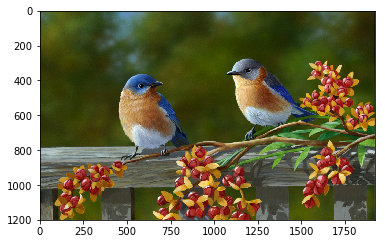

In [3]:
plt.imshow(content_image)

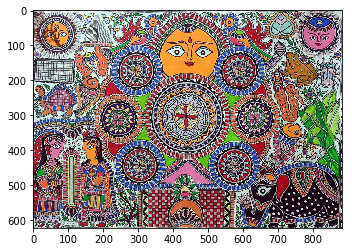

In [4]:
plt.imshow(style_image)

#### Step2
Our Style Transfer application is not a pretrained-model. It is an iterative procedure that over the course of multiple iterations merges content and style together. For convenience, it has been wrapped in a function called <b> StyleXfer </b> that takes the <b> content_image, style_image </b> and a few other parameters as inputs and returns a 224x224x3 RGB image as output.

Note, we internally resize the image to a 224x224x3 image; we recommend that for image clarity, you start with a larger images. This will give you clearer resulting images, and less fuzziness. 

In [7]:
result_image=StyleTransfer.StyleXfer(content_image, style_image, n_iterations=1)

iteration {} 0


### Step 3

Plot the image result_image to see if you like what you see. Most probably, you won't...it needs many more iterations....

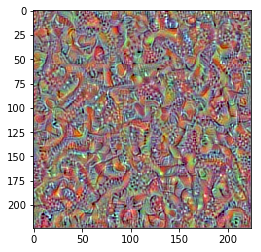

In [8]:
plt.imshow(result_image)# after 1 iteration

....before it starts looking nicer, like this...

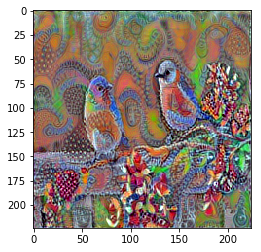

In [6]:
plt.imshow(result_image) # after 10 iterations

You can change the image by rerunning the StyleXfer function with different parameters as below

>StyleXfer(content_image, style_image, n_iterations=5, style_loss_wt=1.0, content_loss_wt=0.2)

You can increase the number of iterations n_iterations to get more definition to the image. You can change the relative weights for content loss and style loss (content_loss_wt and style_loss_wt ), to see the result of various combinations of weights

---

## Experimentation

##### Notes
Make sure you understand how long your model will run for, start with a small value of n_iterations in the range 5 to 10. In general, there will not be big benefits from n_iterations  > 30. 

For different paintings/style, *good looking images* depend not only on the number of iterations but also the weights assigned to the content loss and style loss, using the function parameters *style_loss_wt , content_loss_wt *. In the two runs below, we get very different images based on the values for these weights

Also, you may find that the best looking images come up with smaller number of iterations sometimes, but that , like art, is a matter of subjective preferences.

In [11]:
content_image=plt.imread('/data/two_birds.jpg')
style_image=plt.imread('/data/picasso.jpg')

In [14]:
result_imagex=StyleTransfer.StyleXfer(content_image, style_image, n_iterations=5, style_loss_wt=1.0, content_loss_wt=0.2)

iteration {} 0
iteration {} 1
iteration {} 2
iteration {} 3
iteration {} 4


In [12]:
result_imagey=StyleTransfer.StyleXfer(content_image, style_image, n_iterations=5, style_loss_wt=0.2, content_loss_wt=1.0)

iteration {} 0
iteration {} 1
iteration {} 2
iteration {} 3
iteration {} 4


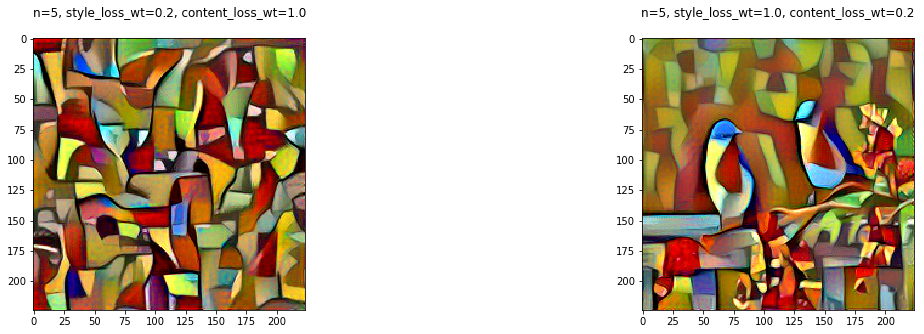

In [26]:
img_list=[result_imagex, result_imagey]
fig=plt.figure(figsize=(20,5))
for i, img in enumerate(img_list):
    fig.add_subplot(1,2,i+1)
    plt.imshow(img)
    if i==1: 
        plt.title('n=5, style_loss_wt=1.0, content_loss_wt=0.2\n')
    else:
        plt.title('n=5, style_loss_wt=0.2, content_loss_wt=1.0\n')